# Sequence Model

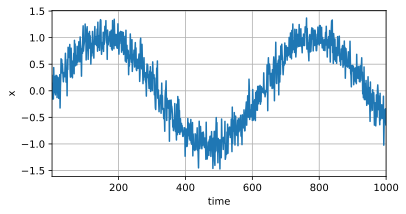

In [2]:
import torch
from torch import nn
from d2l import torch as d2l

T = 1000
time = torch.arange(1, T + 1, dtype=torch.float32)
x = torch.sin(0.01 * time) + torch.normal(0, 0.2, (T,))
d2l.plot(time, [x], "time", "x", xlim=[1, 1000], figsize=(6, 3))

In [3]:
tau = 4
features = torch.zeros((T - tau, tau))
for i in range(tau):
    features[:, i] = x[i:T-tau + i]
labels = x[tau:].reshape((-1, 1))

batch_size, n_train = 16, 600
train_iter = d2l.load_array((features[:n_train], labels[:n_train]), batch_size, is_train=True)

In [5]:
def init_weight(m):
    if type(m) == nn.Linear:
        nn.init.xavier_uniform_(m.weight)

def get_net():
    net = nn.Sequential(nn.Linear(4, 10), nn.ReLU(), nn.Linear(10, 1))
    net.apply(init_weight)
    return net

loss = nn.MSELoss()

In [14]:
def train(net, train_iter, loss, epochs, lr):
    trainer = torch.optim.Adam(net.parameters(), lr)
    for epoch in range(epochs):
        for X, y in train_iter:
            trainer.zero_grad()
            l = loss(net(X), y)
            l.backward()
            trainer.step()
        print(f"epoch {epoch + 1}, "
              f"loss: {d2l.evaluate_loss(net, train_iter, loss)}")

net = get_net()
train(net, train_iter, loss, 5, 0.01)

epoch 1, loss: 0.08517282711047876
epoch 2, loss: 0.05808255507757789
epoch 3, loss: 0.05677275722356219
epoch 4, loss: 0.05565856892223421
epoch 5, loss: 0.05160155034575023


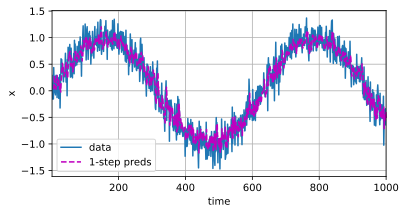

In [15]:
onestep_preds = net(features)
d2l.plot(
    [time, time[tau:]],
    [x.detach(), onestep_preds.detach().numpy()], "time", "x",
    legend=["data", "1-step preds"], xlim=[1, 1000], figsize=(6, 3)
)

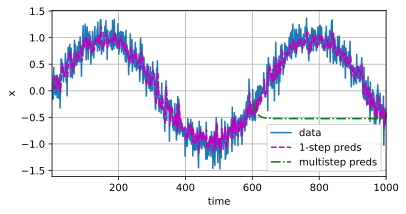

In [18]:
multistep_preds = torch.zeros(T)
multistep_preds[:n_train + tau] = x[:n_train + tau]
for i in range(n_train + tau, T):
    multistep_preds[i] = net(multistep_preds[i - tau:i].reshape((1, -1)))

d2l.plot(
    [time, time[tau:], time[n_train + tau:]],
    [
        x.detach().numpy(),
        onestep_preds.detach().numpy(),
        multistep_preds[n_train + tau:].detach().numpy(),
    ],
    "time", "x",
    legend=["data", "1-step preds", "multistep preds"], xlim=[1, 1000], figsize=(6, 3)
)